# Project: Wrangling and Analyze Data

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

In [1]:
# Import all needed packages 

import pandas as pd # needed for data wrangling and analyzing
import numpy as np # needed in analyzing and visualizing the data
import matplotlib.pyplot as plt # needed for the visualization
%matplotlib inline 
import seaborn as sns # needed for the visualization
import requests # to download the file programmatically
#import tweepy # needed in case twitter API is used
import json # needed to read json files
import re # to search for substring match

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

The WeRateDogs Twitter archive

In [2]:
# The file is downloaded from udacity resources and uploaded directly to the workspace environment
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
#twitter_archive.head(1)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

The tweet image predictions

In [3]:
# The file is downloaded programatically using the Requests library and the given URL
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

# Write the returned content into tsv file
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

# Read TSV file
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t' )
#image_predictions.head(1)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

Additional data from the Twitter API

In [4]:
# create a developer twitter account and use the twitter API
# OR
# copy the code found in twitter-api.py file and paste it here
# OR
# read the already given file from udacity

In [5]:
df_list = []

with open('tweet-json.txt', 'r', encoding='utf8') as file:
    for line in file:
        tweet_line = json.loads(line)
        df_list.append({'tweet_id': tweet_line['id'],
                        'favorites': tweet_line['favorite_count'],
                        'retweets': tweet_line['retweet_count'],
                        'source': tweet_line['source']})
        
twitter_api = pd.DataFrame(df_list)
#twitter_api.head(1)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### *Visual assessment*

In [6]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
twitter_api

,favorites,retweets,source,tweet_id
0,39467,8853,"<a href=""http://twitter.com/download/iphone"" r...",892420643555336193
1,33819,6514,"<a href=""http://twitter.com/download/iphone"" r...",892177421306343426
2,25461,4328,"<a href=""http://twitter.com/download/iphone"" r...",891815181378084864
3,42908,8964,"<a href=""http://twitter.com/download/iphone"" r...",891689557279858688
4,41048,9774,"<a href=""http://twitter.com/download/iphone"" r...",891327558926688256
5,20562,3261,"<a href=""http://twitter.com/download/iphone"" r...",891087950875897856
6,12041,2158,"<a href=""http://twitter.com/download/iphone"" r...",890971913173991426
7,56848,16716,"<a href=""http://twitter.com/download/iphone"" r...",890729181411237888
8,28226,4429,"<a href=""http://twitter.com/download/iphone"" r...",890609185150312448
9,32467,7711,"<a href=""http://twitter.com/download/iphone"" r...",890240255349198849


### *Programmatic assessment*

>**twitter_archive assessment**

In [9]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [11]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
199,854120357044912130,NaN,NaN,2017-04-17 23:52:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Sometimes you guys remind me just how impactfu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/854120357...,14,10,None,None,None,pupper,None
1999,672523490734551040,NaN,NaN,2015-12-03 21:11:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When she says she'll be ready in a minute but ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672523490...,10,10,None,None,None,None,None
1278,708853462201716736,NaN,NaN,2016-03-13 03:13:29 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Lucy. She doesn't understand fetch. 8/...,NaN,NaN,NaN,https://vine.co/v/iHl2UDEBZ95,8,10,Lucy,None,None,None,None
1038,744334592493166593,NaN,NaN,2016-06-19 01:02:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Blanket. She has overthrown her human....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744334592...,11,10,Blanket,None,None,None,None
2261,667549055577362432,NaN,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Never seen dog like this. Breathes heavy. Tilt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055...,1,10,None,None,None,None,None


In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
sum(twitter_archive['tweet_id'].duplicated())

0

In [15]:
twitter_archive['name'].value_counts().sort_values(ascending=False)

None           745
a               55
Charlie         12
Cooper          11
Oliver          11
Lucy            11
Tucker          10
Penny           10
Lola            10
Winston          9
Bo               9
the              8
Sadie            8
Toby             7
Bailey           7
Buddy            7
Daisy            7
an               7
Leo              6
Dave             6
Rusty            6
Bella            6
Milo             6
Jack             6
Stanley          6
Koda             6
Scout            6
Oscar            6
Jax              6
Sunny            5
              ... 
Saydee           1
Banditt          1
Cheryl           1
Obi              1
Kanu             1
Remy             1
Nigel            1
Kevon            1
Cannon           1
Meatball         1
Lacy             1
Shakespeare      1
Mookie           1
Jarvis           1
Brutus           1
Siba             1
Timmy            1
Perry            1
Duchess          1
Venti            1
Dwight           1
Heinrich    

In [16]:
# check for non Alphanumericals in name column
twitter_archive.name[twitter_archive.name.str.contains('^[a-z]+', case = True)]

22            such
56               a
118          quite
169          quite
193          quite
335            not
369            one
542     incredibly
649              a
682            mad
759             an
773           very
801              a
819           very
822           just
852             my
924            one
988            not
992            his
993            one
1002             a
1004             a
1017             a
1025            an
1031          very
1040      actually
1049             a
1063          just
1071       getting
1095           mad
           ...    
2191             a
2198             a
2204            an
2211             a
2212           the
2218             a
2222             a
2235             a
2249             a
2255             a
2264             a
2273             a
2287             a
2304             a
2311             a
2314             a
2326         quite
2327             a
2333            an
2334             a
2335            an
2345        

In [17]:
# check for decimal numerator values
for i, text in twitter_archive['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        print('idx: ', i)
        print('text: ', text)        
        print('rating_numerator in text', re.search('\d+\.\d+', text).group())
        print('Registered rating_numerator', twitter_archive.loc[i].rating_numerator)
        print('\n')

idx:  45
text:  This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
rating_numerator in text 13.5
Registered rating_numerator 5


idx:  340
text:  RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…
rating_numerator in text 9.75
Registered rating_numerator 75


idx:  695
text:  This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
rating_numerator in text 9.75
Registered rating_numerator 75


idx:  763
text:  This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
rating_numerator in text 11.27
Registered rating_numerator 27


idx:  1689
text:  I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. St

In [18]:
twitter_archive.rating_numerator.value_counts().sort_values(ascending=False)
#twitter_archive.rating_numerator.sort_values(ascending=False)

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
121       1
80        1
204       1
24        1
143       1
99        1
45        1
27        1
17        1
1776      1
960       1
666       1
182       1
26        1
144       1
88        1
84        1
165       1
60        1
50        1
44        1
20        1
Name: rating_numerator, dtype: int64

In [19]:
twitter_archive.rating_denominator.value_counts().sort_values(ascending=False)
#twitter_archive.rating_denominator.sort_values(ascending=False)

10     2333
11        3
50        3
80        2
20        2
7         1
2         1
16        1
40        1
0         1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
70        1
Name: rating_denominator, dtype: int64

In [20]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

>**image_predictions assessment**

In [21]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [23]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1575,796031486298386433,https://pbs.twimg.com/media/CwwSaWJWIAASuoY.jpg,1,golden_retriever,0.893775,True,Labrador_retriever,0.070140,True,doormat,0.008419,False
1035,711743778164514816,https://pbs.twimg.com/media/CeCfMPDW0AAAEUj.jpg,1,Lakeland_terrier,0.459515,True,miniature_poodle,0.219661,True,standard_poodle,0.130189,True
612,680130881361686529,https://pbs.twimg.com/media/CXBPbVtWAAA2Vus.jpg,1,Maltese_dog,0.199121,True,West_Highland_white_terrier,0.197897,True,Shih-Tzu,0.157130,True
951,704871453724954624,https://pbs.twimg.com/media/Ccg02LiWEAAJHw1.jpg,1,Norfolk_terrier,0.689504,True,soft-coated_wheaten_terrier,0.101480,True,Norwich_terrier,0.055779,True
1352,759923798737051648,https://pbs.twimg.com/media/CovKqSYVIAAUbUW.jpg,1,Labrador_retriever,0.324579,True,seat_belt,0.109168,False,pug,0.102466,True


In [24]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
image_predictions[image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [27]:
sum(image_predictions.jpg_url.duplicated())

66

In [28]:
# len(g) > 1, checks if the value repeated more than once
pd.concat(g for _, g in image_predictions.groupby("jpg_url") if len(g) > 1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [29]:
image_predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [30]:
print(image_predictions.p1_dog.value_counts(), '\n')
print(image_predictions.p2_dog.value_counts(), '\n')
print(image_predictions.p3_dog.value_counts(), '\n')

True     1532
False     543
Name: p1_dog, dtype: int64 

True     1553
False     522
Name: p2_dog, dtype: int64 

True     1499
False     576
Name: p3_dog, dtype: int64 



In [31]:
image_predictions['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
Cardigan                      19
web_site                      19
Maltese_dog                   18
Shetland_sheepdog             18
Eskimo_dog                    18
beagle                        18
teddy                         18
Lakeland_terrier              17
Rottweiler                    17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [32]:
image_predictions['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
collie                             27
Pembroke                           27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
chow                               20
miniature_pinscher                 20
Samoyed                            20
malinois                           20
toy_terrier                        20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [33]:
image_predictions['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
cocker_spaniel                    31
beagle                            31
Pomeranian                        29
toy_poodle                        29
Pekinese                          29
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
Pembroke                          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
d

In [34]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

>**twitter_api assessment**

In [35]:
twitter_api.head()

,favorites,retweets,source,tweet_id
0,39467,8853,"<a href=""http://twitter.com/download/iphone"" r...",892420643555336193
1,33819,6514,"<a href=""http://twitter.com/download/iphone"" r...",892177421306343426
2,25461,4328,"<a href=""http://twitter.com/download/iphone"" r...",891815181378084864
3,42908,8964,"<a href=""http://twitter.com/download/iphone"" r...",891689557279858688
4,41048,9774,"<a href=""http://twitter.com/download/iphone"" r...",891327558926688256


In [36]:
twitter_api.tail()

,favorites,retweets,source,tweet_id
2349,111,41,"<a href=""http://twitter.com/download/iphone"" r...",666049248165822465
2350,311,147,"<a href=""http://twitter.com/download/iphone"" r...",666044226329800704
2351,128,47,"<a href=""http://twitter.com/download/iphone"" r...",666033412701032449
2352,132,48,"<a href=""http://twitter.com/download/iphone"" r...",666029285002620928
2353,2535,532,"<a href=""http://twitter.com/download/iphone"" r...",666020888022790149


In [37]:
twitter_api.sample(5)

,favorites,retweets,source,tweet_id
1258,2613,1257,"<a href=""http://twitter.com/download/iphone"" r...",710269109699739648
1715,2356,577,"<a href=""http://twitter.com/download/iphone"" r...",680191257256136705
1689,2918,863,"<a href=""http://twitter.com/download/iphone"" r...",681320187870711809
1419,18408,6750,"<a href=""http://twitter.com/download/iphone"" r...",698195409219559425
1443,4274,1887,"<a href=""http://twitter.com/download/iphone"" r...",696518437233913856


In [38]:
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
favorites    2354 non-null int64
retweets     2354 non-null int64
source       2354 non-null object
tweet_id     2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [39]:
twitter_api.describe()

,favorites,retweets,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


In [40]:
twitter_api.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2219
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [41]:
twitter_api[twitter_api.tweet_id.duplicated()]

,favorites,retweets,source,tweet_id


In [42]:
twitter_api.isnull().sum()

favorites    0
retweets     0
source       0
tweet_id     0
dtype: int64

### Quality issues

Completeness, validity, accuracy, consistency (content issues)

- The original tweets only are needed, no retweets

- Many un-needed columns

- \['rating_numerator', 'rating_denominator'\] columns type is int

- duplicated jpg_url

- naming issues

- timestamp type is object instead of being datetime

- the extracted numerators did not contain the decimals values

- missing \[rating\] column that devids the numerator by the denominator

- the tweet_id type is int instead of being object or string

### Tidiness issues

rows, columns, and tables (structural issues)

- Many datatypes (doggo, floofer, pupper and puppo columns)

- day, month, year are in one timestamp column

- many dog type and confidence level columns

- twitter_archive_clean, image_predictions_clean, and twitter_api_clean must be combined

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [43]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
twitter_api_clean = twitter_api.copy()

## Quality Issues

### Issue #1:

#### Define: 

Delete retweets by filtering the null values of retweeted_status_user_id

#### Code

In [44]:
twitter_archive_clean = twitter_archive_clean[
    pd.isnull(twitter_archive_clean['retweeted_status_user_id'])]

#### Test

In [45]:
sum(twitter_archive_clean.retweeted_status_user_id.value_counts())

0

### Issue #2:

#### Define:

Delete unneeded columns

#### Code

In [46]:
# the column names of twitter_archive_clean
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [47]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'source',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)

#### Test

In [48]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Issue #3:

#### Define:

Convert \['rating_numerator', 'rating_denominator'\] columns type from int to float

#### Code

In [49]:
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[[
    'rating_numerator','rating_denominator']].astype(float)

#### Test

In [50]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 186.9+ KB


### Issue #4:

#### Define:

Delete duplicated jpg_url

#### Code

In [51]:
image_predictions_clean = image_predictions_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test

In [52]:
sum(image_predictions_clean['jpg_url'].duplicated())

0

### Issue #5:

#### Define:

Correct naming issues

#### Code

In [53]:
# The caret ^ at the beginning of the set means "NOT". 
# In other words, match all characters that are NOT lowercase or uppercase letters or numbers.
# The plus + matches the preceding character (any non-letter or non-number) 1 or more times.

twitter_archive_clean.name = twitter_archive_clean.name.str.replace('^[a-z]+', 'None')

#### Test

In [54]:
twitter_archive_clean['name'].value_counts()

None           784
Lucy            11
Charlie         11
Cooper          10
Oliver          10
Penny            9
Tucker           9
Winston          8
Lola             8
Sadie            8
Daisy            7
Toby             7
Stanley          6
Koda             6
Oscar            6
Bailey           6
Jax              6
Bella            6
Bo               6
Rusty            5
Chester          5
Leo              5
Milo             5
Scout            5
Bentley          5
Dave             5
Buddy            5
Louis            5
Derek            4
Gus              4
              ... 
Travis           1
Aqua             1
Dido             1
Rupert           1
Dwight           1
Bode             1
Blanket          1
Remy             1
Beya             1
Ike              1
Lucky            1
Dale             1
Halo             1
Skittles         1
Brian            1
Pablo            1
Scott            1
Peanut           1
Duchess          1
Timmy            1
Siba             1
Brutus      

### Issue #6:

#### Define:

Convert timestamp to datetime

#### Code

In [55]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [56]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 186.9+ KB


### Issue #7:

#### Define:

Correct decimal values in the numerator of the rating

#### Code

In [57]:
ratings_decimals_text = []
ratings_decimals_index = []
ratings_decimals = []

for i, text in twitter_archive_clean['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_decimals_text.append(text)
        ratings_decimals_index.append(i)
        ratings_decimals.append(re.search('\d+\.\d+', text).group())

In [58]:
# Text of ratings with decimals        
for text in ratings_decimals_text:
    print(text, '\n')

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948 

This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS 

This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq 

I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace 

Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD 



In [59]:
# Indices of the ratings above (have decimal)
ratings_decimals_index

[45, 695, 763, 1689, 1712]

In [60]:
# the decimal rating values
ratings_decimals

['13.5', '9.75', '11.27', '9.5', '11.26']

In [61]:
# Convert the above decimal ratings to float
for idx, rate in enumerate(ratings_decimals):
    twitter_archive_clean.loc[ratings_decimals_index[idx],'rating_numerator'] = float(rate)

#### Test

In [62]:
for idx in ratings_decimals_index:
    print(twitter_archive_clean.loc[idx].rating_numerator)

13.5
9.75
11.27
9.5
11.26


### Issue #8:

#### Define:

Create a new \[rating\] column by deviding the numerator by the denominator

#### Code

In [65]:
twitter_archive_clean['rating'] = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator']

#### Test

In [66]:
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None,1.2
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,None,None,None,1.3
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,None,1.2


### Issue #9:

#### Define:

convert tweet_id type to string 

#### Code

In [67]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)
twitter_api_clean['tweet_id'] = twitter_api_clean['tweet_id'].astype(str)

#### Test

In [68]:
print(twitter_archive_clean['tweet_id'].dtypes)
print(image_predictions_clean['tweet_id'].dtypes)
print(twitter_api_clean['tweet_id'].dtypes)

object
object
object


## Tidiness Issues

### Issue #1:

#### Define:

Melt \[doggo, floofer, pupper, puppo\] columns to dogs and dogs_stage column

#### Code

In [69]:
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id',                                          
                                                                'timestamp',
                                                                'text',
                                                                'rating_numerator',
                                                                'rating_denominator',
                                                                'name',
                                                                'rating'],
                                                       var_name='dogs', 
                                                       value_name='dogs_stage')

# drop dogs col
twitter_archive_clean = twitter_archive_clean.drop('dogs', 1)

In [70]:
# Sort by dogs_stage 
# drop duplicated based on tweet_id
twitter_archive_clean = twitter_archive_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')

#### Test

In [71]:
twitter_archive_clean['dogs_stage'].value_counts()

None       1828
pupper      234
doggo        75
puppo        25
floofer      10
Name: dogs_stage, dtype: int64

### Issue #2:

#### Define:

Extract \[year, month and day\] values to new columns

#### Code

In [72]:
twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month
twitter_archive_clean['day'] = twitter_archive_clean['timestamp'].dt.day

# drop timestamp column
twitter_archive_clean = twitter_archive_clean.drop('timestamp', 1)

#### Test

In [73]:
list(twitter_archive_clean)

['tweet_id',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'rating',
 'dogs_stage',
 'year',
 'month',
 'day']

### Issue #3:

#### Define:

Keep only the dog type with the max confidence level

#### Code

In [74]:
dog_type = []
confidence_list = []

# function to capture the dog type with highest confidence level 

def image(image_predictions_clean):
    max = 0
    type = ''
    flag = False
    
    if image_predictions_clean['p1_dog'] == True:
        max = image_predictions_clean['p1_conf']
        type = image_predictions_clean['p1']
        flag = True
        
    elif image_predictions_clean['p2_dog'] == True:
        if max == 0 | max < image_predictions_clean['p2_conf']:
            max = image_predictions_clean['p2_conf']
            type = image_predictions_clean['p2']
            flag = True
            
    elif image_predictions_clean['p3_dog'] == True:
        if max == 0 | max < image_predictions_clean['p3_conf']:
            max = image_predictions_clean['p3_conf']
            type = image_predictions_clean['p3']
            flag = True
        
    else:
        dog_type.append('Error')
        confidence_list.append('Error')
        
    # store the type and confidence level
    if flag:
        dog_type.append(type)
        confidence_list.append(max)

# call the function    
image_predictions_clean.apply(image, axis=1)

# create new columns
image_predictions_clean['dog_type'] = dog_type
image_predictions_clean['confidence_list'] = confidence_list

# drop rows that has prediction_list 'error'
image_predictions_clean = image_predictions_clean[image_predictions_clean['dog_type'] != 'Error']

# print list of image_prediction columns
print(list(image_predictions_clean))

['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_type', 'confidence_list']


In [75]:
# Delete uneeded columns
image_predictions_clean = image_predictions_clean.drop(['img_num', 
                                                        'p1', 'p1_conf', 'p1_dog',
                                                        'p2', 'p2_conf', 'p2_dog', 
                                                        'p3', 'p3_conf', 'p3_dog'], 1)

#### Test

In [76]:
image_predictions_clean.head()

,tweet_id,jpg_url,dog_type,confidence_list
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


### Issue #4:

#### Define:

merge twitter_archive_clean and image_predictions_clean

#### Code

In [77]:
df_twitter1 = pd.merge(twitter_archive_clean, 
                      image_predictions_clean, 
                      how = 'left', 
                       on = ['tweet_id'])

df_twitter1.head()

,tweet_id,text,rating_numerator,rating_denominator,name,rating,dogs_stage,year,month,day,jpg_url,dog_type,confidence_list
0,667443425659232256,Exotic dog here. Long neck. Weird paws. Obsess...,6.0,10.0,None,0.6,None,2015,11,19,NaN,NaN,NaN
1,667453023279554560,Meet Cupcake. I would do unspeakable things fo...,11.0,10.0,Cupcake,1.1,None,2015,11,19,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador_retriever,0.82567
2,667455448082227200,This is Reese and Twips. Reese protects Twips....,7.0,10.0,Reese,0.7,None,2015,11,19,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan_terrier,0.676376
3,667470559035432960,This is a northern Wahoo named Kohl. He runs t...,11.0,10.0,None,1.1,None,2015,11,19,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,toy_poodle,0.304175
4,667491009379606528,Two dogs in this one. Both are rare Jujitsu Py...,7.0,10.0,None,0.7,None,2015,11,19,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,borzoi,0.852088


In [78]:
# keep rows that have picture (jpg_url)
df_twitter1 = df_twitter1[df_twitter1['jpg_url'].notnull()]

#### Test

In [79]:
df_twitter1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1624 entries, 1 to 2171
Data columns (total 13 columns):
tweet_id              1624 non-null object
text                  1624 non-null object
rating_numerator      1624 non-null float64
rating_denominator    1624 non-null float64
name                  1624 non-null object
rating                1624 non-null float64
dogs_stage            1624 non-null object
year                  1624 non-null int64
month                 1624 non-null int64
day                   1624 non-null int64
jpg_url               1624 non-null object
dog_type              1624 non-null object
confidence_list       1624 non-null object
dtypes: float64(3), int64(3), object(7)
memory usage: 177.6+ KB


### Issue #5:

#### Define:

merge df_twitter1 and twitter_api_clean

#### Code

In [80]:
df_twitter = pd.merge(df_twitter1, 
                      twitter_api_clean, 
                      how = 'left', 
                      on = ['tweet_id'])

In [81]:
df_twitter.duplicated().sum()

0

#### Test

In [82]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1624 entries, 0 to 1623
Data columns (total 16 columns):
tweet_id              1624 non-null object
text                  1624 non-null object
rating_numerator      1624 non-null float64
rating_denominator    1624 non-null float64
name                  1624 non-null object
rating                1624 non-null float64
dogs_stage            1624 non-null object
year                  1624 non-null int64
month                 1624 non-null int64
day                   1624 non-null int64
jpg_url               1624 non-null object
dog_type              1624 non-null object
confidence_list       1624 non-null object
favorites             1624 non-null int64
retweets              1624 non-null int64
source                1624 non-null object
dtypes: float64(3), int64(5), object(8)
memory usage: 215.7+ KB


In [83]:
df_twitter.head()

,tweet_id,text,rating_numerator,rating_denominator,name,rating,dogs_stage,year,month,day,jpg_url,dog_type,confidence_list,favorites,retweets,source
0,667453023279554560,Meet Cupcake. I would do unspeakable things fo...,11.0,10.0,Cupcake,1.1,None,2015,11,19,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador_retriever,0.82567,327,96,"<a href=""http://twitter.com"" rel=""nofollow"">Tw..."
1,667455448082227200,This is Reese and Twips. Reese protects Twips....,7.0,10.0,Reese,0.7,None,2015,11,19,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan_terrier,0.676376,203,66,"<a href=""http://twitter.com"" rel=""nofollow"">Tw..."
2,667470559035432960,This is a northern Wahoo named Kohl. He runs t...,11.0,10.0,None,1.1,None,2015,11,19,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,toy_poodle,0.304175,273,102,"<a href=""http://twitter.com"" rel=""nofollow"">Tw..."
3,667491009379606528,Two dogs in this one. Both are rare Jujitsu Py...,7.0,10.0,None,0.7,None,2015,11,19,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,borzoi,0.852088,559,242,"<a href=""http://twitter.com"" rel=""nofollow"">Tw..."
4,667495797102141441,This is Philippe from Soviet Russia. Commandin...,9.0,10.0,Philippe,0.9,None,2015,11,20,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,Chihuahua,0.143957,565,294,"<a href=""http://twitter.com"" rel=""nofollow"">Tw..."


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [84]:
#Store the clean DataFrame in a CSV file
df_twitter.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insight I

Check the most common dog type in this dataset

In [85]:
df_twitter['dog_type'].value_counts()

golden_retriever                  142
Labrador_retriever                103
Pembroke                           94
Chihuahua                          87
pug                                60
toy_poodle                         50
chow                               45
Pomeranian                         42
Samoyed                            38
malamute                           32
Chesapeake_Bay_retriever           31
French_bulldog                     30
cocker_spaniel                     26
miniature_pinscher                 24
Eskimo_dog                         22
German_shepherd                    21
Siberian_husky                     20
Staffordshire_bullterrier          20
Shih-Tzu                           20
Rottweiler                         19
Shetland_sheepdog                  19
beagle                             19
Cardigan                           19
kuvasz                             18
Maltese_dog                        18
Lakeland_terrier                   17
basset      

### Insight II

Check the dog types with the lowest and highest rating in this dataset

In [86]:
df_twitter.groupby('dog_type').rating.mean().sort_values(ascending = False)

dog_type
Bouvier_des_Flandres           1.300000
Saluki                         1.250000
briard                         1.233333
Irish_setter                   1.233333
Border_terrier                 1.214286
Tibetan_mastiff                1.200000
standard_schnauzer             1.200000
silky_terrier                  1.200000
Gordon_setter                  1.175000
Samoyed                        1.165789
golden_retriever               1.154706
Australian_terrier             1.150000
giant_schnauzer                1.150000
wire-haired_fox_terrier        1.150000
Great_Pyrenees                 1.146667
Norfolk_terrier                1.142857
Eskimo_dog                     1.140909
Pembroke                       1.139362
chow                           1.137778
Irish_water_spaniel            1.133333
Leonberg                       1.133333
Greater_Swiss_Mountain_dog     1.133333
Doberman                       1.133333
kelpie                         1.130769
Bernese_mountain_dog           

### Insight III

Check the top 3 dog names in this dataset

In [87]:
df_twitter.name.value_counts()

None            482
Charlie          10
Lucy             10
Cooper           10
Oliver            9
Tucker            8
Sadie             7
Daisy             7
Penny             7
Winston           7
Koda              6
Jax               6
Toby              6
Leo               5
Bella             5
Lola              5
Oscar             5
Stanley           5
Maggie            4
Winnie            4
Finn              4
Rusty             4
Cassie            4
Brody             4
Gus               4
Oakley            4
Jack              4
Duke              4
Bear              4
Chester           4
               ... 
Chloe             1
Poppy             1
Zeek              1
Brudge            1
Huck              1
Bert              1
Lupe              1
Scott             1
Rhino             1
Grizz             1
Quinn             1
Newt              1
Grizzie           1
Brownie           1
Ole               1
Lorelei           1
Taco              1
Aiden             1
Evy               1


### Insights:
1. Golden retriever is the most common dog type in this dataset.

2. Bouvier_des_Flandres has the highest average rating. Whereas, Japanese_spaniel has the lowest average rating

3. Lucy, Charlie, and Cooper are found to be the top 3 most common dog names.

### Visualization

Visualize the top 10 most liked dog type.

In [88]:
temp = pd.DataFrame(df_twitter.groupby('dog_type').favorites.mean().sort_values(ascending = False)[:10]).reset_index()
temp

,dog_type,favorites
0,Saluki,24060.000000
1,Bedlington_terrier,21153.166667
2,Bouvier_des_Flandres,18032.000000
3,French_bulldog,17194.100000
4,black-and-tan_coonhound,17012.000000
5,flat-coated_retriever,16791.625000
6,Irish_water_spaniel,16400.000000
7,Leonberg,14934.333333
8,English_springer,14918.111111
9,Mexican_hairless,13590.571429


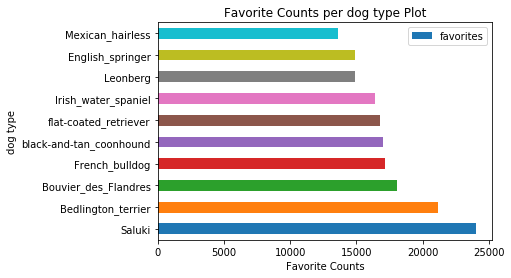

In [91]:
temp.plot(x='dog_type', y='favorites', kind='barh') # horizontal bar 
plt.xlabel('Favorite Counts')
plt.ylabel('dog type')
plt.title('Favorite Counts per dog type Plot')

fig = plt.gcf()
fig.savefig('fav_per_type.png',bbox_inches='tight');